In [11]:
import wfdb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the LUDB records

In [21]:
record_names = list(range(1,201))

for record_name in record_names:

    # Read the record and get the signal data
    record = wfdb.rdrecord(f'data/{record_name}')
    data = record.p_signal
    channel_names = record.sig_name

    # Save the data to a CSV file
    np.savetxt(f'{record_name}' + '.csv', data, delimiter=',')


In [38]:
# Extract the dataframe from a given record
# Each column is a lead
# Each row is 1/500 of a second for a total of 10 seconds of data
def record_as_df(record_name):
    record_df = pd.read_csv(f'data_csvs/{record_name}.csv', header=None)
    record_df.columns = channel_names
    return(record_df)

In [4]:
characteristics = pd.read_csv('characteristics.csv')
characteristics.head()

,Unnamed: 0,ID,Sex,Age,Rhythms,Electric axis of the heart,Conduction abnormalities,Extrasystolies,Hypertrophies,Cardiac pacing,Ischemia,Non-specific repolarization abnormalities,Other states
0,0,1,F\n,51\n,Sinus bradycardia,Electric axis of the heart: left axis deviation,NaN,NaN,Left ventricular overload\nLeft ventricular hy...,NaN,NaN,Non-specific repolarization abnormalities: pos...,NaN
1,1,2,M\n,64\n,Sinus rhythm,Electric axis of the heart: normal,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,NaN,Non-specific repolarization abnormalities: pos...,NaN
2,2,3,M\n,53\n,Sinus rhythm,Electric axis of the heart: vertical,NaN,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Ischemia: inferior wall\nIschemia: lateral wall,NaN,NaN
3,3,4,M\n,56\n,Sinus rhythm,Electric axis of the heart: left axis deviation,Incomplete right bundle branch block,NaN,Left atrial hypertrophy\nLeft ventricular hype...,NaN,Ischemia: inferior wall\nScar formation: infer...,NaN,NaN
4,4,5,M\n,61\n,Sinus rhythm,Electric axis of the heart: horizontal,NaN,NaN,Left atrial hypertrophy,NaN,NaN,Non-specific repolarization abnormalities: inf...,NaN


In [101]:
characteristics.to_csv('characteristics.csv')

In [86]:
def annotations_as_df(record_name):
    annotation_df = record_as_df(record_name)
    for lead in annotation_df.columns:
        annotation = wfdb.rdann(f'data/{record_name}', lead)
        samples = annotation.sample
        symbols = annotation.symbol
        
        index = 0
        new_col = []
        for row in range(5000):
            if row in samples:
                new_col.append(symbols[index])
                index = index + 1
            else:
                new_col.append(np.nan)
        annotation_df[lead] = new_col
        
    return(annotation_df)

In [100]:
## SAVE THE CSVs for the manual annotations!

record_names = list(range(1,201))

for record_name in record_names:

    # Read the record and get the signal data
    adf = annotations_as_df(record_name)
    adf = adf.dropna(how='all')
    
    # Save the data to a CSV file
    adf.to_csv(f'~/Project/annotation_csvs/{record_name}.csv')


# EDA of LUDB Dataset

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Just looking at a couple of records to check them out
df = record_as_df(1)
df.describe()

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.000389,0.000398,0.000661,0.000226,0.000246,0.000020,0.000568,0.000072,0.000035,0.000039,0.000480,0.000341
std,0.106820,0.095866,0.072465,0.107107,0.096558,0.068033,0.101290,0.127703,0.106190,0.095174,0.099589,0.103561
min,-0.109557,-0.135987,-0.778682,-0.886696,-0.114766,-0.368195,-0.804665,-0.395674,-0.245684,-0.198964,-0.116201,-0.096774
25%,-0.027972,-0.026534,0.004068,0.002924,-0.027778,-0.020057,-0.015306,-0.058524,-0.043382,-0.036254,-0.031823,-0.035003
50%,-0.018065,-0.014096,0.012205,0.018275,-0.017544,-0.002865,-0.006560,-0.047074,-0.036742,-0.027190,-0.022662,-0.019218
75%,-0.006410,0.004975,0.021969,0.028509,-0.008772,0.015759,0.029883,-0.015267,-0.015494,-0.007337,-0.005304,0.004118
max,0.890443,0.864013,0.221318,0.113304,0.885234,0.631805,0.195335,0.604326,0.754316,0.801036,0.883799,0.903226


In [41]:
df = record_as_df(2)
df.describe()

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.000924,0.000094,0.000568,0.000636,0.000168,0.000188,0.000335,0.000134,0.000688,0.000269,0.000020,0.000344
std,0.091278,0.084222,0.078780,0.091451,0.101627,0.078696,0.099312,0.134277,0.107571,0.090395,0.104016,0.109491
min,-0.320106,-0.250702,-0.400283,-0.727162,-0.551163,-0.274556,-0.673745,-0.685063,-0.696456,-0.302288,-0.196464,-0.150794
25%,-0.046296,-0.038354,-0.028289,-0.014616,-0.046512,-0.031953,-0.004505,-0.033848,-0.043143,-0.037582,-0.050426,-0.046737
50%,-0.022487,-0.016838,-0.004243,0.020706,-0.018605,-0.010651,0.007722,-0.005887,-0.018490,-0.020697,-0.019646,-0.027337
75%,0.031746,0.013096,0.019802,0.046285,0.039535,0.017751,0.032175,0.043414,0.023883,0.000545,0.006549,0.005291
max,0.679894,0.749298,0.599717,0.272838,0.448837,0.725444,0.326255,0.314937,0.303544,0.697712,0.803536,0.849206


## Summarizing Breakdown of Characteristics

In [5]:
characteristics.columns

Index(['Unnamed: 0', 'ID', 'Sex', 'Age', 'Rhythms',
       'Electric axis of the heart', 'Conduction abnormalities',
       'Extrasystolies', 'Hypertrophies', 'Cardiac pacing', 'Ischemia',
       'Non-specific repolarization abnormalities', 'Other states'],
      dtype='object')

In [117]:
# Terms indicating "normal" conditions
normal_condition = ['Electric axis of the heart: normal', 'Sinus rhythm', ]

In [131]:
non_diagnoses=['Sex', 'Age', 'Cardiac pacing']
diagnoses=['Rhythms','Electric axis of the heart', 'Conduction abnormalities', 'Extrasystolies', 
               'Hypertrophies', 'Ischemia', 'Non-specific repolarization abnormalities', 'Other states']


In [123]:
bin_characteristics = (characteristics == normal_condition[0]) | (characteristics == normal_condition[1]) | (characteristics.isna())

In [127]:
agg_chars = bin_characteristics.aggregate(['sum','count'])
agg_chars

,Unnamed: 0,ID,Sex,Age,Rhythms,Electric axis of the heart,Conduction abnormalities,Extrasystolies,Hypertrophies,Cardiac pacing,Ischemia,Non-specific repolarization abnormalities,Other states
sum,0,0,0,0,142,85,134,186,58,190,149,151,191
count,200,200,200,200,200,200,200,200,200,200,200,200,200


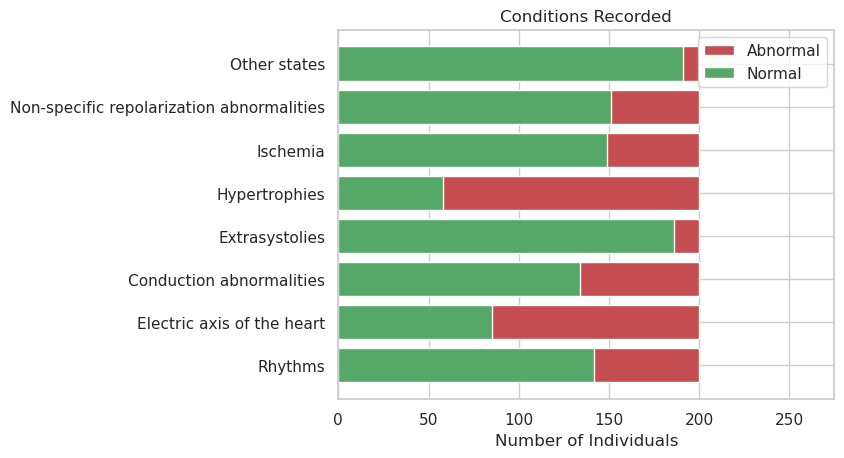

In [203]:
fig,ax=plt.subplots()
ax.grid(alpha=1,zorder=0)
ax.barh(y=diagnoses, width=200, label='Abnormal', color='r',zorder=2)
ax.barh(y=diagnoses, width=agg_chars.loc['sum',diagnoses], label='Normal',zorder=2, color='g')
ax.set_xlim(0,275)
ax.set_title('Conditions Recorded')
ax.set_xlabel('Number of Individuals')
ax.legend();

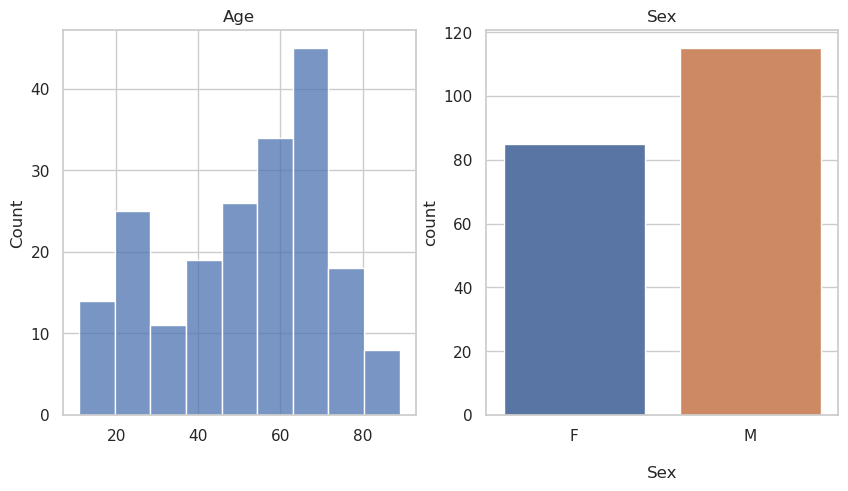

In [195]:
sns.set_theme(style="whitegrid")
fig,axs=plt.subplots(1,2, figsize=(10,5))
for i,char in enumerate(np.array(['Age','Sex'])):
    axs[i].set_title(char)
    if char == 'Age':
        sns.histplot(x=[int(x.strip('>\n')) for x in characteristics['Age']], ax=axs[i])
    else:
        sns.countplot(x=characteristics[char], ax=axs[i])
        
        

In [197]:
pacemaker=pd.Series(['None' if pd.isna(x) else x for x in characteristics['Cardiac pacing']]).value_counts()
pacemaker

None                                                                                  190
Pacemaker presence, undefined\nUnipolar ventricular pacing                              4
Pacemaker presence, undefined\nBipolar ventricular pacing                               2
Pacemaker presence, undefined\nUnipolar ventricular pacing\nUnipolar atrial pacing      1
P-synchrony                                                                             1
Pacemaker presence, undefined\nBiventricular pacing                                     1
Pacemaker presence, undefined\nP-synchrony\nUnipolar ventricular pacing                 1
dtype: int64

In [200]:
np.mean([int(x.strip('>\n')) for x in characteristics['Age']])

51.97